In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seWrapper
import astropy.units as u
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV
import colorKDE
import pickle

reload(seWrapper)
reload(colorKDE)

<module 'colorKDE' from 'colorKDE.pyc'>

In [70]:

color_dist = colorKDE.colorKDE(data=data)
color_dist.runCVSearch()

Optimal bandwidth: 0.070612244898


In [71]:
color_dist = colorKDE.colorKDE(data=data)
color_dist.runKDE(bandwidth=0.07)
color_dist.save('cropped_color_dist.p',full=False)

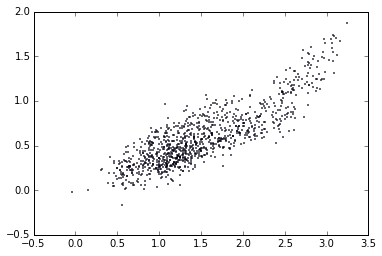

In [79]:
new_color_dist = pickle.load(open('cropped_color_dist.p','rb'))
new_samples  = new_color_dist.sample(n_samples=1000)
plt.scatter(new_samples[:,0],new_samples[:,1],s=0.5)

In [67]:
%time new_color_dist.score_samples(new_samples)

CPU times: user 89.2 ms, sys: 84 µs, total: 89.3 ms
Wall time: 89.3 ms


array([ -6.40669900e-01,  -5.51269425e-02,  -4.57210207e-01,
        -7.04557934e-01,  -9.79392424e-01,   4.76992186e-01,
        -6.21645500e-01,  -2.85902708e-01,  -1.02192902e-01,
        -1.25237215e-01,  -1.32466187e+00,  -2.44571457e+00,
        -1.18121528e+00,   6.73811114e-02,   6.55340801e-01,
        -6.23994081e-01,  -7.18490341e-01,  -2.61041371e-01,
         5.86510101e-01,   8.29728815e-01,  -1.56236727e+00,
        -5.57325688e-01,   2.62473849e-01,  -1.10972607e+00,
        -1.42307897e+00,  -3.86945581e-01,  -1.02509589e+00,
        -4.39645366e-01,   7.16595563e-01,  -4.62907775e-01,
         3.50090984e-01,  -4.48920824e-01,  -1.27318406e+00,
         3.23965252e-01,  -6.36040659e-01,  -2.03414546e-01,
         6.16686970e-01,  -1.04730056e-01,  -3.36262236e-01,
         8.52672102e-02,   2.99293445e-01,   8.12267475e-01,
        -2.10200801e+00,  -3.45355528e-01,  -8.48001687e-01,
        -9.47097829e-02,  -1.73114351e-01,   8.07281385e-01,
        -1.69990507e-01,

In [3]:
cat = seWrapper.seCatalog()
cat.createNewCatalog('g_crop.cat','g')

new_cat = seWrapper.seCatalog()
new_cat.createNewCatalog('r_crop.cat','r')

cat.mergeCatalog(new_cat,match_rad=0.5*u.arcsec)

new_cat = seWrapper.seCatalog()
new_cat.createNewCatalog('i_crop.cat','i')

cat.mergeCatalog(new_cat,match_rad=0.5*u.arcsec)

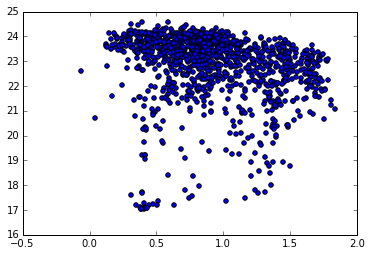

In [4]:
m = cat.all_detected
plt.scatter(cat.mags['g'][m]-cat.mags['r'][m],cat.mags['r'][m])

(-0.5, 2.5)

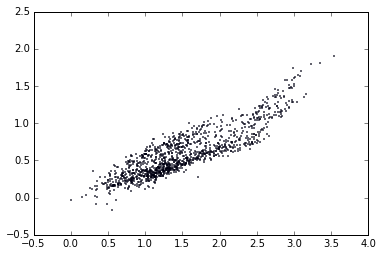

In [5]:
m = cat.all_detected
plt.scatter(cat.mags['g'][m]-cat.mags['i'][m],cat.mags['r'][m]-cat.mags['i'][m],s=0.5)
plt.xlim(-0.5,4.0)
plt.ylim(-0.5,2.5)

(array([  13.,    4.,    3.,    1.,    2.,    2.,    1.,    1.,    1.,
           3.,    2.,    0.,    2.,    4.,    0.,    3.,    2.,    6.,
           7.,    2.,    5.,    4.,    4.,    6.,    4.,    5.,    7.,
          10.,   13.,   15.,   12.,   14.,   17.,   25.,   18.,   28.,
          35.,   35.,   53.,   67.,   83.,   86.,  105.,  114.,  109.,
         103.,   84.,   58.,   29.,    9.]),
 array([ 17.4411 ,  17.59977,  17.75844,  17.91711,  18.07578,  18.23445,
         18.39312,  18.55179,  18.71046,  18.86913,  19.0278 ,  19.18647,
         19.34514,  19.50381,  19.66248,  19.82115,  19.97982,  20.13849,
         20.29716,  20.45583,  20.6145 ,  20.77317,  20.93184,  21.09051,
         21.24918,  21.40785,  21.56652,  21.72519,  21.88386,  22.04253,
         22.2012 ,  22.35987,  22.51854,  22.67721,  22.83588,  22.99455,
         23.15322,  23.31189,  23.47056,  23.62923,  23.7879 ,  23.94657,
         24.10524,  24.26391,  24.42258,  24.58125,  24.73992,  24.89859,
        

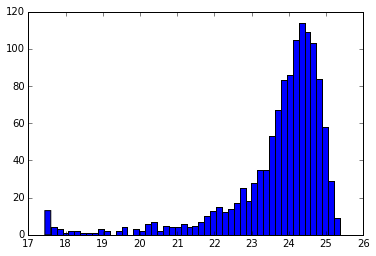

In [6]:
plt.hist(cat.mags['g'][m],bins=50)

In [7]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = skl.neighbors.KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])



In [76]:
data = np.array([cat.mags['g'][m]-cat.mags['i'][m],cat.mags['r']-cat.mags['i']]).T
kde_skl = KernelDensity(bandwidth=[0.5,0.001])
kde_skl.fit(data)
samples = kde_skl.sample(n_samples=1216)

In [9]:
#cross validation:
grid = GridSearchCV(KernelDensity(),{'bandwidth':np.array([np.linspace(0.001,0.5,100),np.linspace(0.001,0.5,100)])})
grid.fit(data)
print grid.best_params_['bandwidth']

ValueError: Parameter array should be one-dimensional.

(-0.5, 2.5)

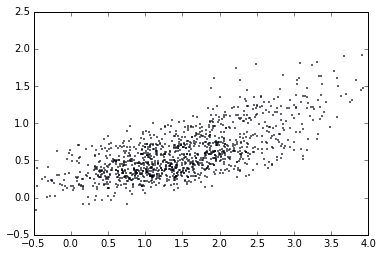

In [177]:
plt.scatter(samples[:,0],samples[:,1],s=0.5)
plt.xlim(-0.5,4.0)
plt.ylim(-0.5,2.5)

(array([   1.,    1.,    7.,   17.,   49.,   89.,   76.,  134.,  154.,
         133.,  109.,   91.,   56.,   46.,   55.,   48.,   38.,   43.,
          34.,   22.,    8.,    2.,    1.,    0.,    0.,    0.,    0.,
           0.,    1.,    1.]),
 array([-0.12654685,  0.02912678,  0.18480042,  0.34047405,  0.49614769,
         0.65182132,  0.80749496,  0.96316859,  1.11884223,  1.27451586,
         1.4301895 ,  1.58586313,  1.74153677,  1.8972104 ,  2.05288403,
         2.20855767,  2.3642313 ,  2.51990494,  2.67557857,  2.83125221,
         2.98692584,  3.14259948,  3.29827311,  3.45394675,  3.60962038,
         3.76529402,  3.92096765,  4.07664128,  4.23231492,  4.38798855,
         4.54366219]),
 <a list of 30 Patch objects>)

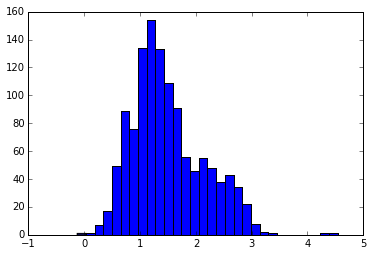

In [125]:
plt.hist(samples,bins=30)

(-0.5, 2.5)

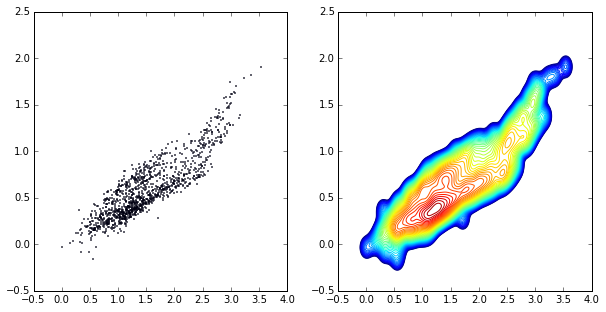

In [83]:
fig,axis = plt.subplots(ncols=2,figsize=(10,5))

#axis[0].scatter(samples[:,0],samples[:,1],s=0.5)
#axis[0].set_xlim([-0.5,4.0])
#axis[0].set_ylim([-0.5,2.5])

axis[0].scatter(cat.mags['g'][m]-cat.mags['i'][m],cat.mags['r'][m]-cat.mags['i'][m],s=0.5)
axis[0].set_xlim(-0.5,4.0)
axis[0].set_ylim(-0.5,2.5)

x = np.linspace(-0.5,4.0,500)
y = np.linspace(-0.5,2.5,500)
X,Y = np.meshgrid(x,y)
xy = np.vstack([X.ravel(),Y.ravel()]).T
Z = new_color_dist.score_samples(xy)
Z = Z.reshape(X.shape)

axis[1].contour(X,Y,Z,levels=np.linspace(-5,1.0,50))
axis[1].set_xlim([-0.5,4.0])
axis[1].set_ylim([-0.5,2.5])

In [75]:
xy.shape

(250000, 2)